[[0.33333333]]
[[0.22916667]
 [0.33333333]]
[[0.12239583]
 [0.22916667]
 [0.3046875 ]
 [0.33333333]]
[[0.06217448]
 [0.12239583]
 [0.17871094]
 [0.22916667]
 [0.2718099 ]
 [0.3046875 ]
 [0.32584635]
 [0.33333333]]
[[0.03120931]
 [0.06217448]
 [0.09265137]
 [0.12239583]
 [0.15116374]
 [0.17871094]
 [0.20479329]
 [0.22916667]
 [0.25158691]
 [0.2718099 ]
 [0.28959147]
 [0.3046875 ]
 [0.31685384]
 [0.32584635]
 [0.3314209 ]
 [0.33333333]]


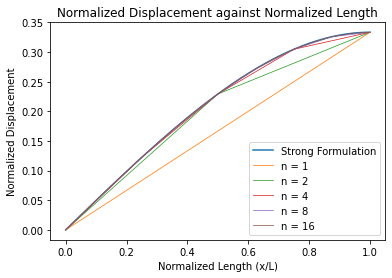

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rho = 1
omega = 1
A = 1
E = 1
L = 1

# strong formulation
xs = np.linspace(0, L, 250)
u = [rho * omega * omega / 2 / E * ((L*L)*x - x**3/3) for x in xs]
plt.plot(xs, u, label='Strong Formulation')

# weak formulation
def f(x):
  return rho * A * omega * omega * x


N_lst = []
for i in range(0, 5):
  n = 2**i

  # k matrix
  K = np.zeros((n, n))
  dx = L/n
  for j in range(0, len(K)):
    for k in range(0, len(K[0])):
      if j == k:
        if j == n - 1:
          K[j][k] = 1
        else:
          K[j][k] = 2
      elif np.abs(j - k) == 1:
        K[j][k] = -1
      else:
        K[j][k] = 0
  K = A * E / dx * K

  # f matrix
  F = np.zeros((n, 1))
  for l in range(1, n+1):
    if l == n:
      F[l-1] = dx/6 * (f((l-1) * dx) + 2 * f(l * dx))
    else:
      F[l-1] = dx/6 * (f((l-1) * dx) + 4 * f(l * dx) + f(l + 1) * dx)

  U = np.linalg.solve(K, F)

  # n matrix
  N = np.zeros((n, 1))
  for m in range(1, n+1):
    if m == 1:
      N[m-1] = A*E*U[m-1] / dx
    else:
      N[m-1] = A*E*(U[m-1] - U[m-2]) / dx
  N_lst.append(N)

  print(U)

  U = np.insert(U, 0, 0)
  norm_xs = np.linspace(0, L, n+1)
  plt.plot(norm_xs, U, label='n = '+str(n), linewidth=0.75)

plt.xlabel('Normalized Length (x/L)')
plt.ylabel('Normalized Displacement')
plt.legend(loc='lower right')
plt.title('Normalized Displacement against Normalized Length')
plt.show()


[array([[0.33333333]]), array([[0.45833333],
       [0.20833333]]), array([[0.48958333],
       [0.42708333],
       [0.30208333],
       [0.11458333]]), array([[0.49739583],
       [0.48177083],
       [0.45052083],
       [0.40364583],
       [0.34114583],
       [0.26302083],
       [0.16927083],
       [0.05989583]]), array([[0.49934896],
       [0.49544271],
       [0.48763021],
       [0.47591146],
       [0.46028646],
       [0.44075521],
       [0.41731771],
       [0.38997396],
       [0.35872396],
       [0.32356771],
       [0.28450521],
       [0.24153646],
       [0.19466146],
       [0.14388021],
       [0.08919271],
       [0.03059896]])]


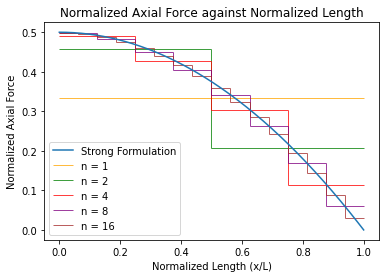

In [ ]:
xs2 = np.linspace(0, L, 250)
N = [rho * A * omega * omega / 2 * (L*L - x*x) for x in xs]
plt.plot(xs2, N, label='Strong Formulation')

color_lst = ['orange', 'green', 'red', 'purple', 'brown']
print(N_lst)
for i in range(0, 5):
  color = color_lst[i]
  n = 2**i
  N_temp = N_lst[i]
  norm_temp_xs = np.linspace(0, L, n + 1)
  for o in range(0, len(N_temp)):
    if o == 0:
      plt.hlines(y = N_temp[o], xmin = norm_temp_xs[o], xmax = norm_temp_xs[o+1], label='n = '+str(n), color=color, linewidth=0.75)
    else:
      plt.hlines(y = N_temp[o], xmin = norm_temp_xs[o], xmax = norm_temp_xs[o+1], color=color, linewidth=0.75)
    if o + 2 < len(norm_temp_xs):
      plt.vlines(norm_temp_xs[o+1], N_temp[o+1], N_temp[o], color=color, linewidth=0.75)



plt.xlabel('Normalized Length (x/L)')
plt.ylabel('Normalized Axial Force')
plt.legend(loc='lower left')
plt.title('Normalized Axial Force against Normalized Length')
plt.show()


[[0.53072542]]
[[0.3862463  0.53072542]]
[[0.26521358 0.48134271 0.53072542]]
[[0.20093565 0.3862463  0.50207959 0.53072542]]
[[0.16149852 0.31499704 0.45249556 0.51205875 0.53072542]]


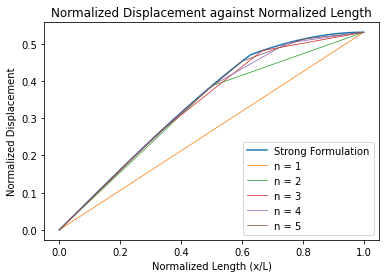

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rho = 1
omega = 1
A = 1
E = 1
L = 1

P = rho * L * L * A * omega * omega * np.pi / 10

# strong formulation
xs1 = np.linspace(0, np.pi / 5, 500)
xs2 = np.linspace(np.pi / 5, L, 500)
u1 = [rho * omega * omega / 2 / E * ((L*L)*x - x**3/3) + P / A / E * x for x in xs1]
u2 = [rho * omega * omega / 2 / E * ((L*L)*x - x**3/3) + P * np.pi * L / 5 / A / E for x in xs2]

xs = np.concatenate([xs1, xs2])
u = u1 + u2
plt.plot(xs, u, label='Strong Formulation')

# weak formulation
def f(x):
  return rho * A * omega * omega * x

def u(x):
  if x < np.pi/5:
    return rho * omega * omega / 2 / E * ((L*L)*x - x**3/3) + P / A / E * x
  else:
    return rho * omega * omega / 2 / E * ((L*L)*x - x**3/3) + P * np.pi * L / 5 / A / E

def mae(U):
  N_samp = 0
  current_pos = 0
  outputs = np.array([])
  exacts = np.array([])
  for i in range(0, len(U) - 1):
    dx = L / (len(U) - 1)
    selects = np.linspace(current_pos, current_pos + dx, 50)
    N_samp += 50
    outputs = np.concatenate((outputs, np.array([(U[i+1] - U[i])/dx * (x - current_pos) + U[i] for x in selects])))
    exacts = np.concatenate((exacts, np.array([u(x) for x in selects])))
    current_pos += dx
  abs = np.absolute(outputs - exacts)
  mean_abs = 1 / N_samp * np.sum(abs)
  return mean_abs


N_lst = []
maes = []
final = 5
for i in range(0, final):
  n = i + 1

  # k matrix
  K = np.zeros((n, n))
  dx = L/n
  for j in range(0, len(K)):
    for k in range(0, len(K[0])):
      if j == k:
        if j == n - 1:
          K[j][k] = 1
        else:
          K[j][k] = 2
      elif np.abs(j - k) == 1:
        K[j][k] = -1
      else:
        K[j][k] = 0
  K = A * E / dx * K

  # f matrix
  F = np.zeros((n, 1))
  for l in range(1, n+1):
    if l == n:
      F[l-1] = dx/6 * (f((l-1) * dx) + 2 * f(l * dx))
    else:
      F[l-1] = dx/6 * (f((l-1) * dx) + 4 * f(l * dx) + f(l + 1) * dx)

  # f matrix correction
  x_M = np.pi/5 * L
  F_correction = np.zeros((n,1))
  delta = x_M % (L / n)
  index = int((x_M - delta) / (L / n))
  if (index == 0):
    F_correction[0][0] = (delta / (L / n)) * P
  else:
    F_correction[index - 1][0] = (1 - (delta / (L/n))) * P
    F_correction[index][0] = (delta / (L/n)) * P

  F = F + F_correction

  U = np.linalg.solve(K, F)
  # remove the hashtag below at your own risk
  print(U.T)

  # n matrix
  N = np.zeros((n, 1))
  for m in range(1, n+1):
    if m == 1:
      N[m-1] = A*E*U[m-1] / dx
    else:
      N[m-1] = A*E*(U[m-1] - U[m-2]) / dx
  N_lst.append(N)
  U = np.insert(U, 0, 0)
  if i < 5:
    norm_xs = np.linspace(0, L, n+1)
    plt.plot(norm_xs, U, label='n = '+str(n), linewidth=0.75)
  maes.append(mae(U))




plt.xlabel('Normalized Length (x/L)')
plt.ylabel('Normalized Displacement')
plt.legend(loc='lower right')
plt.title('Normalized Displacement against Normalized Length')
plt.show()


[0.07675542225041633, 0.017542027569443112, 0.006274867992469515, 0.004954094897821036, 0.0023809148834083786, 0.00189092697538654, 0.001585519461256324, 0.0006997051311984785, 0.0009333785118282133, 0.0007205746261803291, 0.012353206184662974, 0.011370323629371343, 0.0003688515453185093, 0.00033556043637370723, 0.000348533769462204, 0.00018961149780935335, 0.00025681410097897915, 0.00022752697191320788, 0.0001378380364415222, 0.00019652694654471252, 0.0001472463002009339, 0.00013063172198831807, 0.0001492053149676081, 9.044196468489885e-05, 0.00011620720653711972, 0.00011118156555785113, 6.318282123471332e-05, 9.944965473572171e-05, 8.00593802557832e-05, 6.719586059051257e-05, 8.242445704778499e-05, 5.411828537733845e-05, 6.504531328491016e-05, 6.60842135914937e-05, 3.440905303079799e-05, 5.948234035520157e-05, 5.0767515387905995e-05, 3.9834770641078084e-05, 5.2126763970295536e-05, 3.6576124699091754e-05, 4.092585839511673e-05, 4.388456796300232e-05, 2.351808774927999e-05, 3.925842462

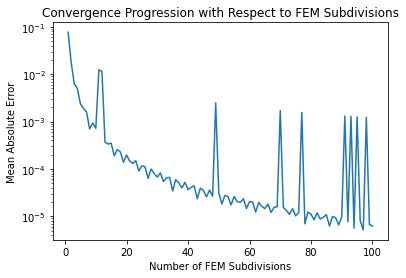

In [ ]:
nums = range(1, final + 1)
print(maes)
plt.plot(nums, maes)
plt.xlabel('Number of FEM Subdivisions')
plt.ylabel('Mean Absolute Error')
plt.yscale('log')
plt.title('Convergence Progression with Respect to FEM Subdivisions')
plt.show()

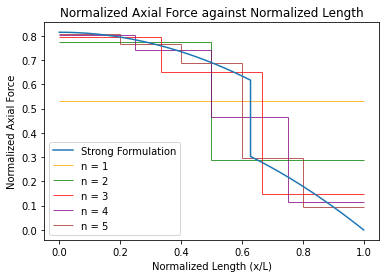

In [ ]:
xs1 = np.linspace(0, np.pi / 5, 125)
xs2 = np.linspace(np.pi / 5, L, 125)
N1 = [rho * A * omega * omega * (L*L - x*x)/2 + P for x in xs1]
N2 = [rho * A * omega * omega * (L*L - x*x)/2 for x in xs2]

xs = np.concatenate([xs1, xs2])
N = N1 + N2
plt.plot(xs, N, label='Strong Formulation')

color_lst = ['orange', 'green', 'red', 'purple', 'brown']
# remove the hashtag below at your own risk
#print(N_lst)
for i in range(0, 5):
  color = color_lst[i]
  n = i + 1
  N_temp = N_lst[i]
  norm_temp_xs = np.linspace(0, L, n + 1)
  for o in range(0, len(N_temp)):
    if o == 0:
      plt.hlines(y = N_temp[o], xmin = norm_temp_xs[o], xmax = norm_temp_xs[o+1], label='n = '+str(n), color=color, linewidth=0.75)
    else:
      plt.hlines(y = N_temp[o], xmin = norm_temp_xs[o], xmax = norm_temp_xs[o+1], color=color, linewidth=0.75)
    if o + 2 < len(norm_temp_xs):
      plt.vlines(norm_temp_xs[o+1], N_temp[o+1], N_temp[o], color=color, linewidth=0.75)



plt.xlabel('Normalized Length (x/L)')
plt.ylabel('Normalized Axial Force')
plt.legend(loc='lower left')
plt.title('Normalized Axial Force against Normalized Length')
plt.show()